<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
#function shape gives us the number of rows and number of columns
movies.shape


(979, 6)

#### Check the data type of each column.


In [4]:
# Answer:
#info gives us detail about number of rows, columns and type of columns
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
# Answer:
#get the column duration, then get the mean (average) then round the number
round(movies['duration'].mean())


121

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
#sort moviesby using function sortvalues of the column duration
movies = movies.sort_values(by=['duration'])
movies

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E5C3BB508>]],
      dtype=object)

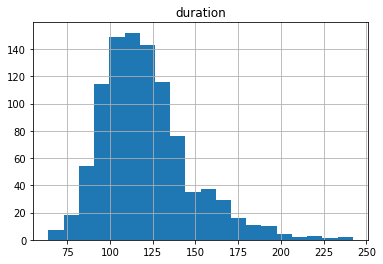

In [7]:
# Answer:
# Choose the column as duration and put in the code hist to create histogram.
# The appropriate bin here is using scott methods
movies.hist(column="duration", bins ='scott')

#### Use a box plot to display that same data.

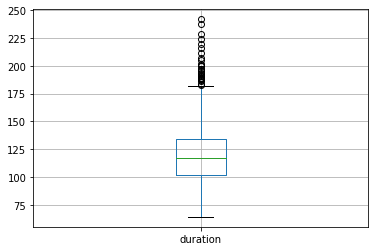

In [8]:
# Answer:
movies.boxplot(column="duration")

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
#Group the movies by using content rating column, then use size to return the number of values
movies["content_rating"].value_counts()

content_count = movies.groupby("content_rating").size()
content_count
#movies["content_rating"].value_counts().plot.bar()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

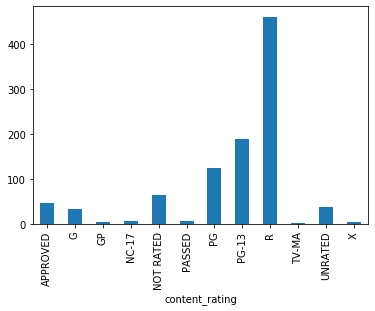

In [10]:
# Answer:
content_count.plot.bar()
#movies["content_rating"].value_counts().plot.bar()

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
#using replace to replace value from one to another

movies["content_rating"]=movies["content_rating"].replace("NOT RATED","UNRATED")
movies["content_rating"]=movies["content_rating"].replace("APPROVED","UNRATED")
movies["content_rating"]=movies["content_rating"].replace("PASSED","UNRATED",)
movies["content_rating"]=movies["content_rating"].replace("GP","UNRATED" )
        
movies

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,UNRATED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Convert the following content ratings to "NC-17": X, TV-MA.


In [25]:
# Answer:
#similar to abvove, using replace
movies["content_rating"]=movies["content_rating"].replace("X","NC-17" )
movies["content_rating"]=movies["content_rating"].replace("TV-MA","NC-17" )


#### Count the number of missing values in each column.

In [85]:
# Answer:
#Use loop to assign i to column's name
#then sum the isnull  value then print it out

for i in movies.columns:
    missingvalue = movies[i].isnull().sum()
    print ("Missing value in column " + i +" is: " + str(missingvalue))



Missing value in column star_rating is: 0
Missing value in column title is: 0
Missing value in column content_rating is: 3
Missing value in column genre is: 0
Missing value in column duration is: 0
Missing value in column actors_list is: 0


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [90]:
# Answer:
#As we have content rating as UNRATED, the missing values will be filled with this UNRATED value

movies["content_rating"]=movies["content_rating"].fillna("UNRATED")
#print (movies["content_rating"].isnull().sum())

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,UNRATED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [111]:
# Answer:
# Using numpy average with condition (weights for movies duration)
#Condition is more than 120 minutes and another variable of less than 120 minutes
import numpy as np

staravg_2hours = np.average(movies["star_rating"],weights = (movies["duration"]>=120))
staravg_less2hours = np.average(movies["star_rating"],weights = (movies["duration"]<120))

print (staravg_2hours)
print (staravg_less2hours)



7.948898678414097
7.838666666666665


#### Use a visualization to detect whether there is a relationship between duration and star rating.

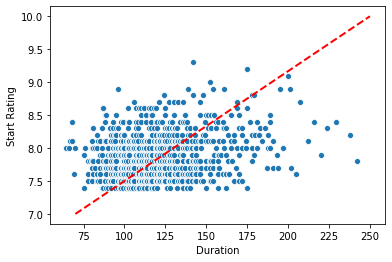

In [107]:
# Answer:
#import seaborn to display the scatterplot
#column x start from 70 to 250, because our value is within that range.
#This is similar to star rating
import seaborn as sns

sns.scatterplot(movies["duration"], movies["star_rating"])
plt.plot([70,250], [7, 10], '--', linewidth=2, c="r")
plt.xlabel("Duration")
plt.ylabel("Start Rating")
plt.show()

#### Calculate the average duration for each genre.

In [120]:
# Answer:
dur_avg_genre = movies.groupby("genre")["duration"].mean()
dur_avg_genre

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

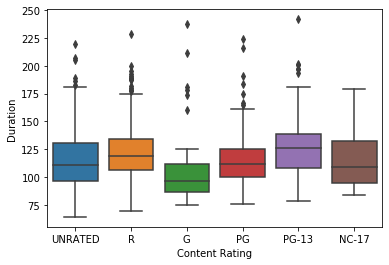

In [210]:
# Answer:
#Using boxplot to show the distribution of duration in each category of content rating

sns.boxplot(movies["content_rating"],movies["duration"])
plt.xlabel("Content Rating")
plt.ylabel("Duration")
plt.show()



#### Determine the top rated movie (by star rating) for each genre.

In [194]:
#Sort start rating with top values at top, and then groupby and only use the first of each genre

topmovie = movies.sort_values("star_rating", ascending = False).groupby("genre").head(1)
topmovie


    

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [179]:
# Answer:
#movies.duplicated to check the duplicate in the subset(columns) title.
#if yes, get these into the movies dataset and assign to dup_title and print it out
#we can see the result that they are not duplicated based on the actor list
dup_title = movies[movies.duplicated(subset = 'title')]

dup_title

,star_rating,title,content_rating,genre,duration,actors_list
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [195]:
# Answer:
#groupby genre and then use transformed to filter the [genre] with size >10
#then groupby of the new variable and calculate the mean

new_movies = movies[movies.groupby("genre")["genre"].transform("size")>=10]
new_movies.groupby("genre")["star_rating"].mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [241]:
# Answer:
#assign val_count to counting values of genre column
#filter column with any value more than 10, and choose the index
val_count = movies["genre"].value_counts()
val_count = val_count[val_count >=10].index

new_movies = movies[movies["genre"].isin(val_count)]
new_movies.groupby("genre")["star_rating"].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [251]:
# Answer:
#calculate the mean by genre first
#then filter new movies with value_count of movies that more than 10
new_movies = movies.groupby("genre")["star_rating"].mean()
new_movies = new_movies[movies["genre"].value_counts()>=10]
new_movies

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [261]:
# Answer:
new_movies = movies.groupby("genre")["star_rating"].agg(["count","mean"])
new_movies = new_movies[new_movies["count"]>=10]
new_movies["mean"]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: mean, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!